In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gzip
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [2]:
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        return images

In [3]:
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [4]:
train_x = images_file_read('Dataset/mnist/train-images-idx3-ubyte.gz')
print(train_x.shape)

(60000, 28, 28)


In [13]:
train_x = np.reshape(train_x, (60000,784))
print(train_x.shape)

(60000, 784)


In [6]:
train_y = labels_file_read('Dataset/mnist/train-labels-idx1-ubyte.gz')
print(train_y.shape)

(60000,)


In [7]:
test_x = images_file_read('Dataset/mnist/t10k-images-idx3-ubyte.gz')
print(test_x.shape)

(10000, 28, 28)


In [14]:
test_x = np.reshape(test_x, (10000,784))
print(train_y.shape)

(60000,)


In [9]:
test_y = labels_file_read('Dataset/mnist/t10k-labels-idx1-ubyte.gz')
print(test_y.shape)

(10000,)


# n_components = 15

In [16]:
pca_15 = PCA(n_components=15, random_state=0)

In [17]:
train_x_15 = pca_15.fit_transform(train_x)

In [22]:
test_x_15 = pca_15.transform(test_x)

In [23]:
lda_15 = LinearDiscriminantAnalysis()

In [25]:
lda_15.fit(train_x_15,train_y)

LinearDiscriminantAnalysis()

In [26]:
print('Accuracy : ',lda_15.score(test_x_15,test_y)*100, '%')

Accuracy :  80.39 %


# n_components = 8

In [27]:
pca_8 = PCA(n_components=8, random_state=0)

In [28]:
train_x_8 = pca_8.fit_transform(train_x)

In [29]:
test_x_8 = pca_8.transform(test_x)

In [30]:
lda_8 = LinearDiscriminantAnalysis()

In [31]:
lda_8.fit(train_x_8,train_y)

LinearDiscriminantAnalysis()

In [32]:
print('Accuracy : ',lda_8.score(test_x_8,test_y)*100, '%')

Accuracy :  76.05 %


# n_components = 3

In [33]:
pca_3 = PCA(n_components=3, random_state=0)

In [34]:
train_x_3 = pca_3.fit_transform(train_x)

In [35]:
test_x_3 = pca_3.transform(test_x)

In [36]:
lda_3 = LinearDiscriminantAnalysis()

In [37]:
lda_3.fit(train_x_3,train_y)

LinearDiscriminantAnalysis()

In [38]:
print('Accuracy : ',lda_3.score(test_x_3,test_y)*100, '%')

Accuracy :  46.6 %


# Plot

In [39]:
data = {'n_components=15':80.39, 'n_components=8':76.05, 'n_components=3':46.6}

In [40]:
x_axis = list(data.keys())
y_axis = list(data.values())

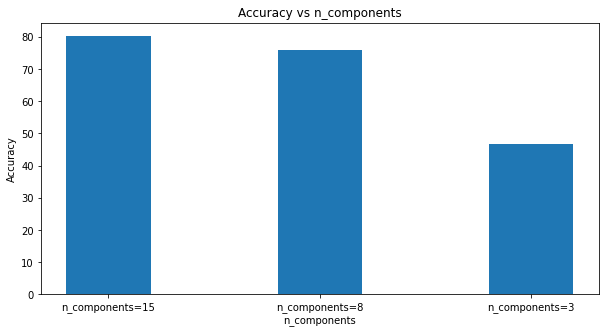

In [41]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, width = 0.4)
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_components')
plt.show()